In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import fsolve
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

In [3]:
#Define findsolutions function

def findsolutions(alpha,beta,A,B,C,D):
    fx = lambda x: x - beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B)
    fy = lambda y: y - beta/alpha*(C * tanh(beta/alpha * (A * tanh(y)+B)) + D)
    solxlist = [] #I will store here the solutions xstar
    solylist = [] #I will store here the solutions ystar
    step = 0.1 #Step to search for the solutions
    initvalue = -10 #Starting point to search for the solutions
    endvalue = abs(initvalue) + step #End point to search for the solutions: the + step is because 
    for ic in arange(initvalue,endvalue,step):
        if abs(ic) >= step: #I need this because if I start at zero, there are numerical problems. I take off the points at distance step
            solx = fsolve(fx,ic)
            soly = fsolve(fy,ic)
            solxlist.append(round(float(solx),5))
            solylist.append(round(float(soly),5))
    solxlist = list(set(list(solxlist))) #Get rid of duplicated solutions
    solylist = list(set(list(solylist))) #Get rid of duplicated solutions
    
    solutionstilde = [] #Find the right couplings (xstar,ystar)
    for solx in solxlist:
        for soly in solylist:
            #print solx
            #print soly
            #print round(solx,2)
            #print round( (1-alpha) * solx + beta * (A * tanh(soly) + B) , 2)
            #print round(soly,2)
            #print round( (1-alpha) * soly + beta * (C * tanh(solx) + D) , 2)
            s1 = round(solx,2) == round( (1-alpha) * solx + beta * (A * tanh(soly) + B) , 2)
            s2 = round(soly,2) == round( (1-alpha) * soly + beta * (C * tanh(solx) + D) , 2)
            if s1 and s2:
                solutionstilde.append((solx,soly))
    stable = []
    unstable = []
    for (xtilde,ytilde) in solutionstilde:
        J11 = 1 - alpha
        J12 = A * beta / (cosh(ytilde))**2
        J21 = C * beta / (cosh(xtilde))**2
        J22 = 1 - alpha
        M=numpy.matrix([[J11, J12],[J21, J22]])
        eigenvalues=linalg.eigvals(M)
        control = 0
        for eigen in eigenvalues:        
            if abs(eigen)>1: 
                control = 1                        
        if control == 1: unstable.append((xtilde,ytilde))
        if control == 0: stable.append((xtilde,ytilde))
    return solutionstilde,unstable,stable

In [19]:
#Test the classification system for symmetric games

#here it has problems if the solution is rounded too much

A = -1.6
B = 1.4
C = A
D = B
alpha = 0.5
beta = 0.2

solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)

sol = 1/(1+exp(-2*array(stable)))
print sol
if sol.shape[0]==2: print "blue"
if sol.shape[0]==1 & (abs(sol[0][0]-0.5)>0.2): print "grey"
if sol.shape[0]==1 & (abs(sol[0][0]-0.5)<0.2): print "green"

[[ 0.66669174  0.66669174]]
green


In [22]:
sol[0][0]-0.5

0.16669173718191199

In [9]:
#Test the classification system for symmetric games

#here it has problems if the solution not rounded enough

A = -1.96
B = 1.74
C = A
D = B
alpha = 0.5
beta = 0.5

solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)

sol = 1/(1+exp(-2*array(stable)))
print sol
if sol.shape[0]==2: print "blue"
if sol.shape[0]==1 & (abs(sol[0][0]-0.5)>0.2): print "grey"
if sol.shape[0]==1 & (abs(sol[0][0]-0.5)<0.2): print "green"

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
#Here finds the taxonomy for all symmetric games

ngrid = 100
taxonomy = [[3 for x in range(2*ngrid+1)] for x in range(ngrid+1)] 
i=0
j=0
for B in linspace(2,0,ngrid+1):
    j = 0
    for A in linspace(-2,2,2*ngrid+1):
        C = A
        D = B
        alpha = 0.5
        beta = 0.5

        solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
        sol = 1/(1+exp(-2*array(stable)))
        
        if len(sol)==0: 
            j = j + 1
            continue
        
        if sol.shape[0]==2: taxonomy[i][j]=0
        if sol.shape[0]==1 & (abs(sol[0][0]-0.5)>0.2): taxonomy[i][j]=1
        if sol.shape[0]==1 & (abs(sol[0][0]-0.5)<0.2): taxonomy[i][j]=2
        j = j + 1
    i = i + 1   

C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [7]:
for i in range(ngrid+1):
    for j in range(2*ngrid+1):
        if taxonomy[i][j]==3: 
            print "new"
            print i
            print j

new
13
2
new
21
118
new
22
116
new
40
58
new
62
9
new
67
34
new
73
200
new
74
198
new
74
199
new
75
197
new
76
195
new
76
196
new
77
194
new
78
193
new
80
189
new
80
190
new
81
188
new
82
187
new
83
185
new
84
184
new
85
182
new
86
180
new
86
181
new
87
179
new
88
177
new
89
175
new
89
176
new
90
173
new
90
174
new
92
17
new
92
170
new
93
168
new
94
166
new
95
164
new
96
162
new
97
159
new
97
160
new
98
156
new
98
157
new
99
110
new
99
152
new
99
153
new
99
154


In [11]:
taxonomy[13][2]=0
taxonomy[62][9]=0
taxonomy[67][34]=0
taxonomy[92][17]=0
taxonomy[99][110]=2

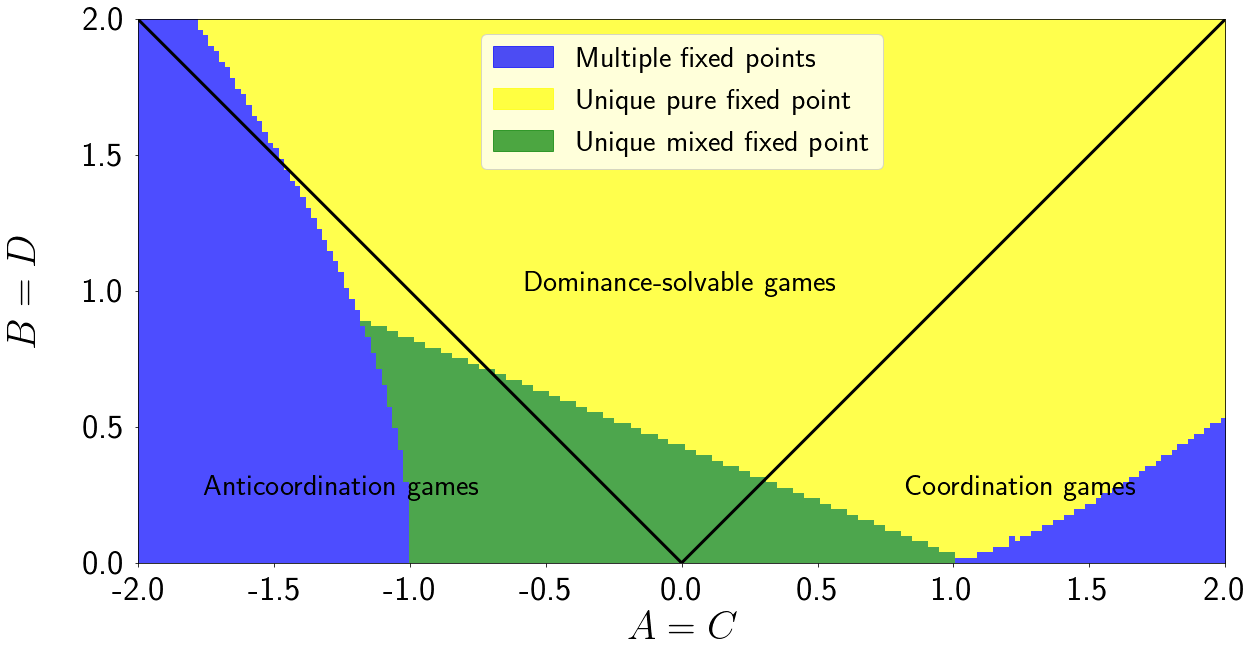

In [11]:
rcParams['text.usetex'] = True


#here plots the taxonomy without game examples
Alist = linspace(-2,2,2*ngrid+1)
Blist = linspace(2,0,ngrid+1)
fig=figure(figsize=(21,10))
ax = fig.add_subplot(1,1,1) 
vmax=3.
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'blue'),
                                                    (1 / vmax, 'yellow'),
                                                    (2 / vmax, 'green'),
                                                    (3 / vmax, 'yellow')]
                                        )
#pcolor(Alist, Blist, array(taxonomy), cmap=cmap, vmin=0, vmax=3.0)
imshow(taxonomy, cmap=cmap, vmin=0, vmax=3.0,interpolation="none",extent=[-2,2,0,2], alpha=0.7)

xlabel(r'$A=C$',fontsize=40)
h = ylabel(r'$B=D$',fontsize=40)
#h.set_rotation(1)
ax.set_xticks(linspace(-2,2,9))
ax.set_xticklabels(linspace(-2,2,9), fontsize = 35)
ax.set_yticks(linspace(0,2,5))
ax.set_yticklabels(linspace(0,2,5), fontsize = 35)
ax.yaxis.labelpad = 40
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
l = Line2D([0,2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
l = Line2D([0,-2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
ax.text(0,1,"Dominance-solvable games", fontsize = 30,ha="center")
ax.text(-1.25,0.25,"Anticoordination games", fontsize = 30,ha="center")
ax.text(1.25,0.25,"Coordination games", fontsize = 30,ha="center")
multiplefp = mpatches.Patch(color='blue', alpha=0.7, label='Multiple fixed points')
uniquepurefp = mpatches.Patch(color='yellow',alpha=0.7, label='Unique pure fixed point')
uniquemixedfp = mpatches.Patch(color='green', alpha=0.7,label='Unique mixed fixed point')

legend(handles=[multiplefp,uniquepurefp,uniquemixedfp],fontsize = 30)



#savefig("ACpositive.pdf")

In [12]:
text_file = open("taxonomynumerical.txt", "w")
text_file.write(str(taxonomy))
text_file.close()

In [15]:
taxonomy = eval(open("taxonomynumerical.txt", "r").read())

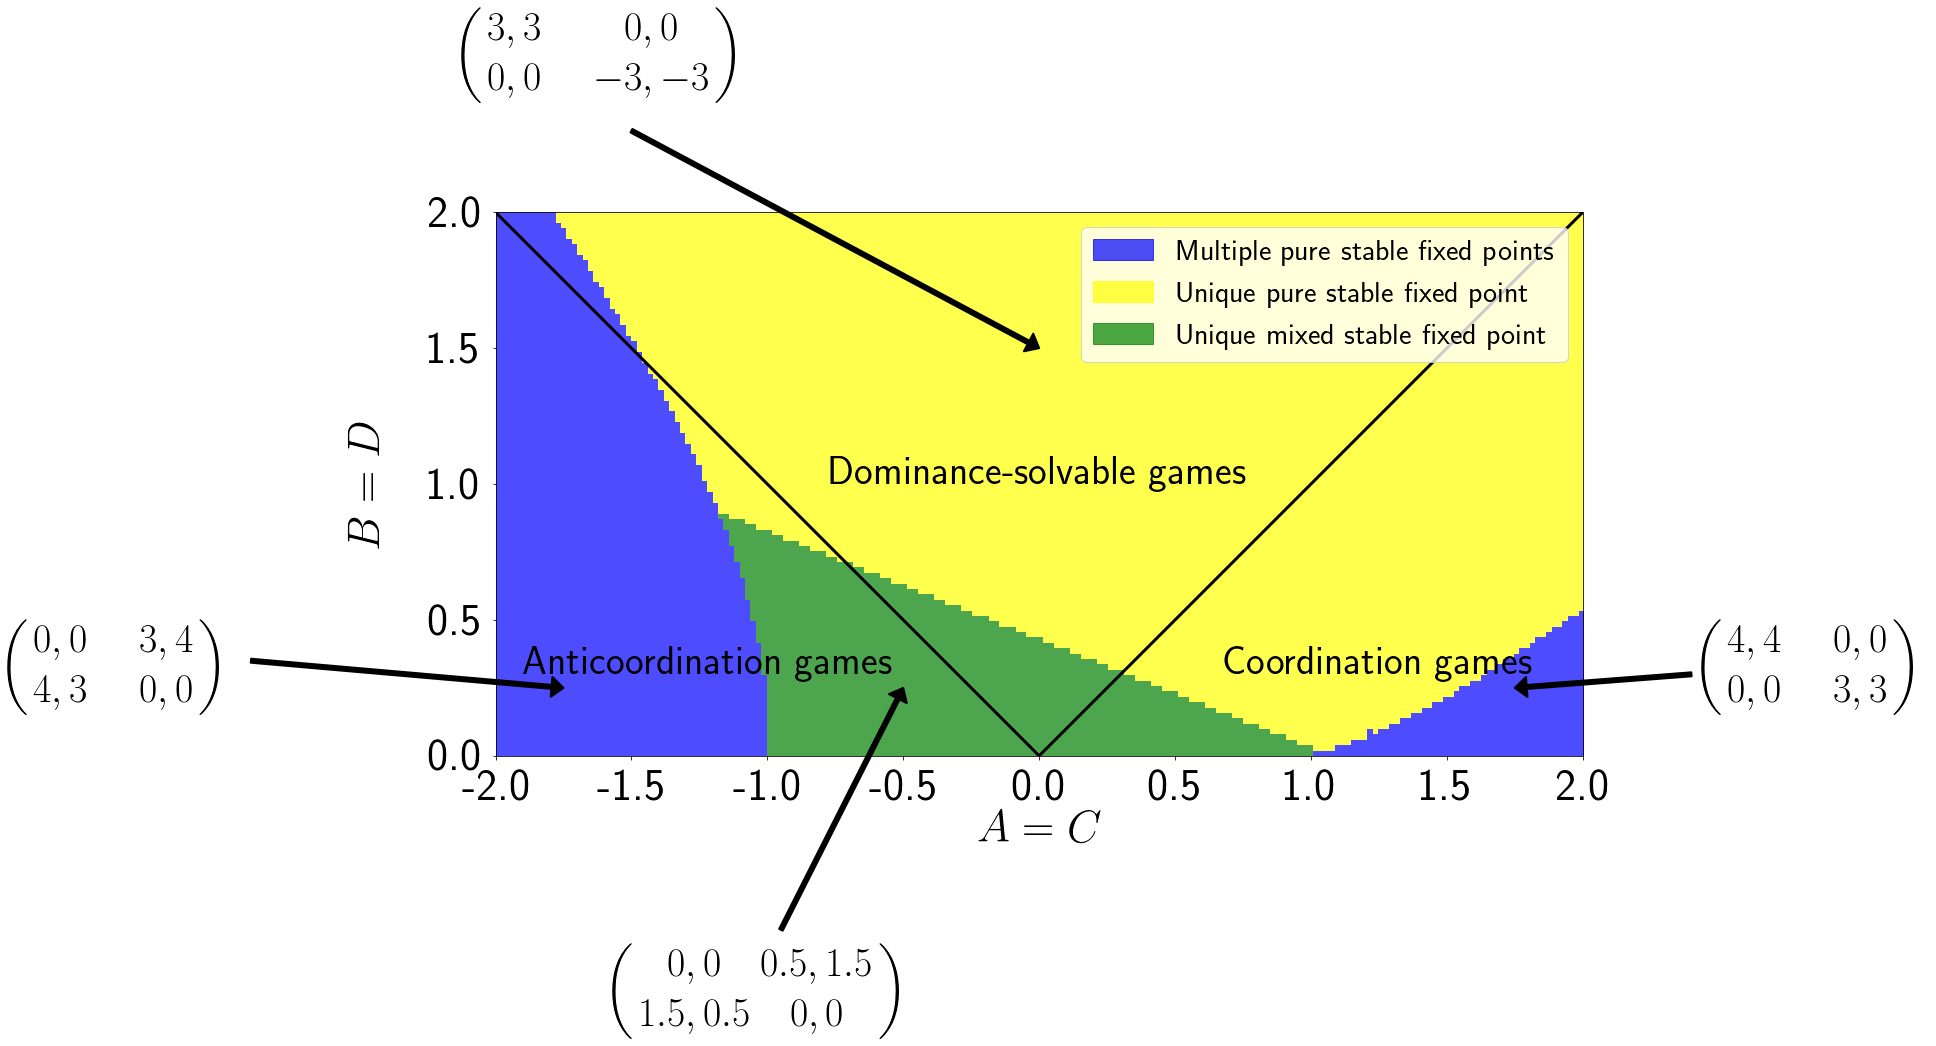

In [16]:
#here plots the taxonomy with game examples

ngrid = 100

rcParams['text.usetex'] = True

Alist = linspace(-2,2,2*ngrid+1)
Blist = linspace(2,0,ngrid+1)
fig=figure(figsize=(21,10))
ax = fig.add_subplot(1,1,1) 
ax.get_position()
#ax.set_position([0.2,0.2,box.width*0.5, box.height*0.5])

vmax=3.
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'blue'),
                                                    (1 / vmax, 'yellow'),
                                                    (2 / vmax, 'green'),
                                                    (3 / vmax, 'yellow')]
                                        )
#pcolor(Alist, Blist, array(taxonomy), cmap=cmap, vmin=0, vmax=3.0)
ax.imshow(taxonomy, cmap=cmap, vmin=0, vmax=3.0,interpolation="none",extent=[-2,2,0,2], alpha=0.7)

xlabel(r'$A=C$',fontsize=45)
h = ylabel(r'$B=D$',fontsize=45)
ax.set_xticks(linspace(-2,2,9))
ax.set_xticklabels(linspace(-2,2,9), fontsize = 45)
ax.set_yticks(linspace(0,2,5))
ax.set_yticklabels(linspace(0,2,5), fontsize = 45)
ax.yaxis.labelpad = 40
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
l = Line2D([0,2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
l = Line2D([0,-2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
ax.text(0,1,"Dominance-solvable games", fontsize = 40,ha="center")
ax.text(-1.22,0.3,"Anticoordination games", fontsize = 40,ha="center")
ax.text(1.25,0.3,"Coordination games", fontsize = 40,ha="center")
multiplefp = mpatches.Patch(color='blue', alpha=0.7, label='Multiple pure stable fixed points')
uniquepurefp = mpatches.Patch(color='yellow',alpha=0.7, label='Unique pure stable fixed point')
uniquemixedfp = mpatches.Patch(color='green', alpha=0.7,label='Unique mixed stable fixed point')
legend(handles=[multiplefp,uniquepurefp,uniquemixedfp],fontsize = 30,loc=1)

figtext(-0.17,0.2,r'$\left( {\begin{array}{cc}0,0 \hphantom{M} & 3,4 \\       4,3 \hphantom{M} & 0,0    \end{array} } \right)$',fontsize = 40,color="k")
ax.annotate('', xy=(-1.75, 0.25), xytext=(-2.9, 0.35), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.95,0.2,r'$\left( {\begin{array}{cc}4,4 \hphantom{M} & 0,0 \\       0,0 \hphantom{M} & 3,3    \end{array} } \right)$',fontsize = 40,color="k")
ax.annotate('', xy=(1.75, 0.25), xytext=(2.4, 0.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.13,1.05,r'$\left( {\begin{array}{cc}3,3 \hphantom{M} & 0,0 \\       0,0 \hphantom{M} & -3,-3    \end{array} } \right)$',fontsize = 40,color="k")
ax.annotate('', xy=(0, 1.5), xytext=(-1.5, 2.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.23,-0.25,r'$\left( {\begin{array}{cc}0,0  & 0.5,1.5 \\       1.5,0.5  & 0,0    \end{array} } \right)$',fontsize = 40,color="k")
ax.annotate('', xy=(-0.5, 0.25), xytext=(-0.95, -0.64), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

#savefig("ACpositive_annotated.png", bbox_inches = 'tight')

In [194]:
def drawplot(alpha,beta,A,B,C,D):
    x=linspace(-10,10,101)
    plot(x,beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B))
    plot(x,x)

def psi(x):
    return beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B)

In [195]:
def makeplot():
    x=linspace(minx,maxx,201)
    miny = min(psi(x))-1
    maxy = max(psi(x))+1


    fig=figure(figsize=(12,3.5))
    ax1 = fig.add_subplot(1,2,1) 
    ax2 = fig.add_subplot(1,2,2) 

    ax1.spines['left'].set_position('zero')
    ax1.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    ax1.set_xticks(linspace(minx,maxx,5))
    ax1.set_xticklabels([round(i,1) for i in linspace(minx,maxx,5)], fontsize = 22)
    ax1.set_yticks(linspace(miny,maxy,5))
    ax1.set_yticklabels([round(i,1) for i in linspace(miny,maxy,5)], fontsize = 22)

    ax1.set_xlim((minx,maxx))
    ax1.set_ylim((miny,maxy))

    ax1.text(maxx*1.1,-maxy/10,r'$\tilde{x}$',fontsize=35)
    ax1.text(maxx*posxx,maxy*posxy,r'$\tilde{x}$',fontsize=35,color="red")
    ax1.text(maxx*pospsix,maxy*pospsiy,r'$\Psi(\tilde{x})$',fontsize=35,color="blue")

    ax1.plot(x,psi(x),color="blue",linewidth=2)
    ax1.plot(x,x,color="red",linewidth=2)

    solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
    solutionsunstable = 1/(1+exp(-2*array(unstable)))
    solutionsstable = 1/(1+exp(-2*array(stable)))
    solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
    solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
    sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
    sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
    ax2.set_xticks(linspace(0,1,3))
    ax2.set_xticklabels(linspace(0,1,3), fontsize = 25)
    ax2.set_yticks(linspace(0,1,3))
    ax2.set_yticklabels(linspace(0,1,3), fontsize = 25)

    plt.xlabel(r'$x$',fontsize=40) 
    plt.ylabel(r'$y$',fontsize=40) 
    ax2.set_aspect('equal')
    ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
    ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
    ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

    #savefig("illustration_solution_1.png", bbox_inches = 'tight')

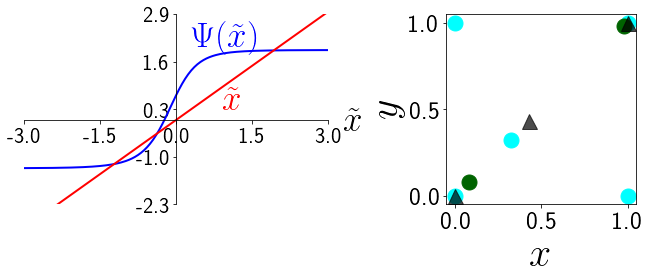

In [197]:
alpha = 0.5
beta = 0.5
A = 1.75
B = 0.25
C = A
D = B

minx = -3
maxx = 3
posxx = 0.3
posxy = 0.1
pospsix = 0.1
pospsiy = 0.7

NElistR=[0,1,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

makeplot()

#savefig("illustration_solution_1.png", bbox_inches = 'tight')

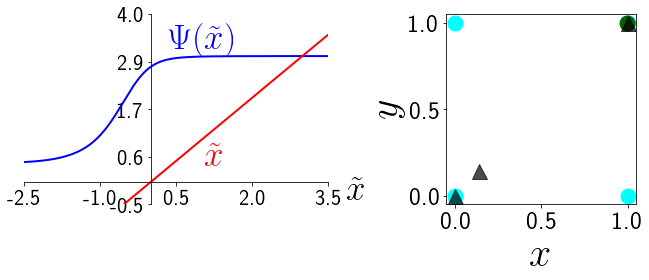

In [196]:
alpha = 0.5
beta = 0.5
A = 1.75
B = 1.25
C = A
D = B

minx = -2.5
maxx = 3.5
posxx = 0.3
posxy = 0.1
pospsix = 0.1
pospsiy = 0.8

NElistR=[0,1,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

makeplot()

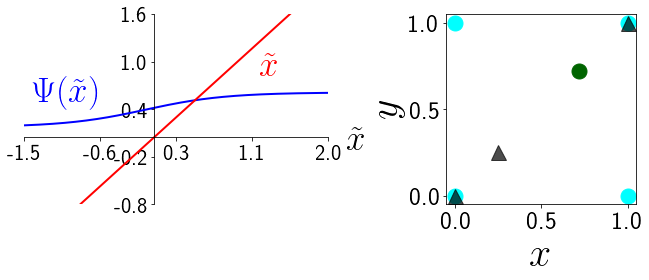

In [208]:
alpha = 0.5
beta = 0.5
A = 0.5
B = 0.25
C = A
D = B

minx = -1.5
maxx = 2
posxx = 0.6
posxy = 0.5
pospsix = -0.7
pospsiy = 0.3

NElistR=[0,1,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

makeplot()

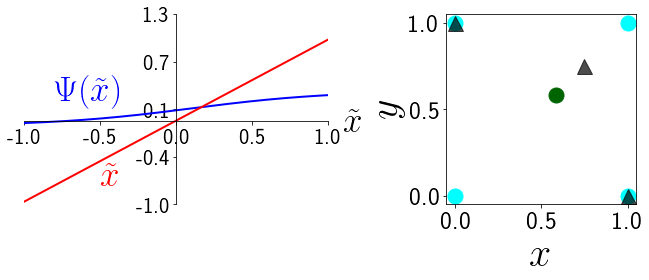

In [300]:
alpha = 0.5
beta = 0.5
A = -0.5
B = 0.25
C = A
D = B

minx = -1
maxx = 1
posxx = -0.5
posxy = -0.6
pospsix = -0.8
pospsiy = 0.2

NElistR=[1,0,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

makeplot()

savefig("illustration_solution_2.png", bbox_inches = 'tight')

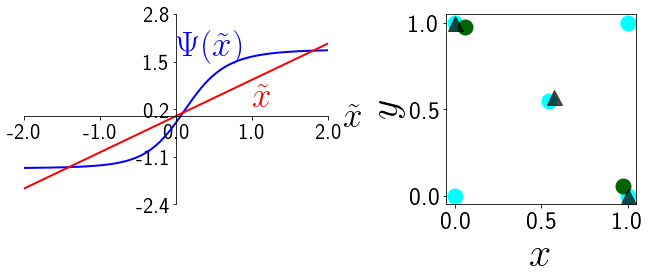

In [301]:
alpha = 0.5
beta = 0.5
A = -1.75
B = 0.25
C = A
D = B

minx = -2
maxx = 2
posxx = 0.5
posxy = 0.1
pospsix = 0.
pospsiy = 0.6

NElistR=[1,0,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

makeplot()

savefig("illustration_solution_3.png", bbox_inches = 'tight')

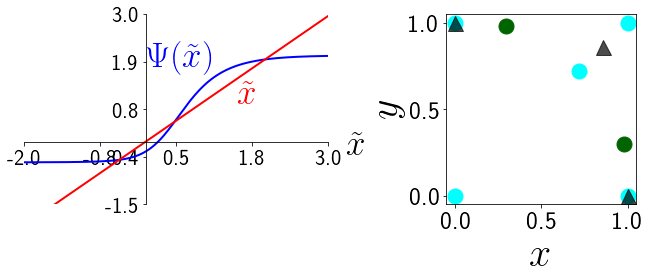

In [219]:
alpha = 0.5
beta = 0.5
A = -1.75
B = 1.25
C = A
D = B

minx = -2
maxx = 3
posxx = 0.5
posxy = 0.3
pospsix = 0.
pospsiy = 0.6

NElistR=[1,0,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

makeplot()

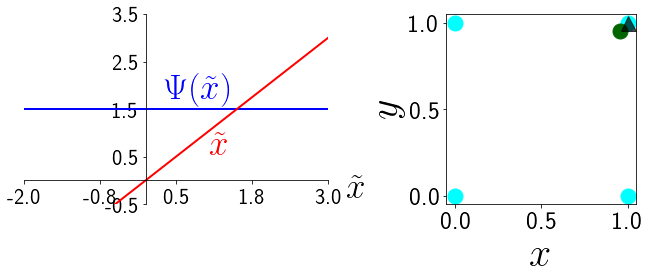

In [296]:
alpha = 0.5
beta = 0.5
A = 0
B = 1.5
C = A
D = B

minx = -2
maxx = 3
posxx = 0.35
posxy = 0.16
pospsix = 0.1
pospsiy = 0.5

NElistR=[1]
NElistC=[1]

x=linspace(minx,maxx,201)
miny = min(psi(x))-2
maxy = max(psi(x))+2


fig=figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

ax1.set_xticks(linspace(minx,maxx,5))
ax1.set_xticklabels([round(i,1) for i in linspace(minx,maxx,5)], fontsize = 22)
ax1.set_yticks(linspace(miny,maxy,5))
ax1.set_yticklabels([round(i,1) for i in linspace(miny,maxy,5)], fontsize = 22)

ax1.set_xlim((minx,maxx))
ax1.set_ylim((miny,maxy))

ax1.text(maxx*1.1,-maxy/10,r'$\tilde{x}$',fontsize=35)
ax1.text(maxx*posxx,maxy*posxy,r'$\tilde{x}$',fontsize=35,color="red")
ax1.text(maxx*pospsix,maxy*pospsiy,r'$\Psi(\tilde{x})$',fontsize=35,color="blue")

ax1.plot(x,psi(x),color="blue",linewidth=2)
ax1.plot(x,x,color="red",linewidth=2)

solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
solutionsunstable = 1/(1+exp(-2*array(unstable)))
solutionsstable = 1/(1+exp(-2*array(stable)))
solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(linspace(0,1,3), fontsize = 25)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 25)

plt.xlabel(r'$x$',fontsize=40) 
plt.ylabel(r'$y$',fontsize=40) 
ax2.set_aspect('equal')
ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

savefig("illustration_solution_4.png", bbox_inches = 'tight')

In [138]:
#Test the classification system for symmetric games: need to consider the limit cycles case

A = 2.
B = 2.
C = -A
D = -B
alpha = 0.8
beta = 0.8

solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
print solutionstilde
#if len(solutionstilde)==0: continue
    
sol = 1/(1+exp(-2*array(stable)))
print sol
if len(sol)==0: print "red"
if sol.shape[0]==1 & (abs(sol[0][0]-0.5)>0.2): print "grey"
if sol.shape[0]==1 & (abs(sol[0][0]-0.5)<0.2): print "green"

[(0.05741, -2.11469)]
[[ 0.52867351  0.01435242]]
green


In [139]:
#Here finds the taxonomy for all asymmetric games


ngrid = 100
taxonomy = [[3 for x in range(ngrid+1)] for x in range(ngrid+1)] 
i=0
j=0
for B in linspace(2,0,ngrid+1):
    j = 0
    for A in linspace(0,2,ngrid+1):
        C = -A
        D = B
        alpha = 0.8
        beta = 0.8

        solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)

        if len(solutionstilde)==0: 
            j = j + 1
            continue
        
        sol = 1/(1+exp(-2*array(stable)))
        
        if len(sol)==0: 
            taxonomy[i][j]=0
            j = j + 1
            continue
        if sol.shape[0]==1 & (abs(sol[0][0]-0.5)>0.2): taxonomy[i][j]=1
        if sol.shape[0]==1 & (abs(sol[0][0]-0.5)<0.2): taxonomy[i][j]=2                        
        j = j + 1
    i = i + 1    

In [167]:
for i in range(ngrid+1):
    for j in range(ngrid+1):
        if taxonomy[i][j]==3: 
            print "new"
            print i
            print j

In [144]:
text_file = open("taxonomynumericalantisymmetric.txt", "w")
text_file.write(str(taxonomy))
text_file.close()

In [ ]:
taxonomy = eval(open("taxonomynumericalantisymmetric.txt", "r").read())

In [141]:
taxonomy[83][80]=0
taxonomy[94][68]=0

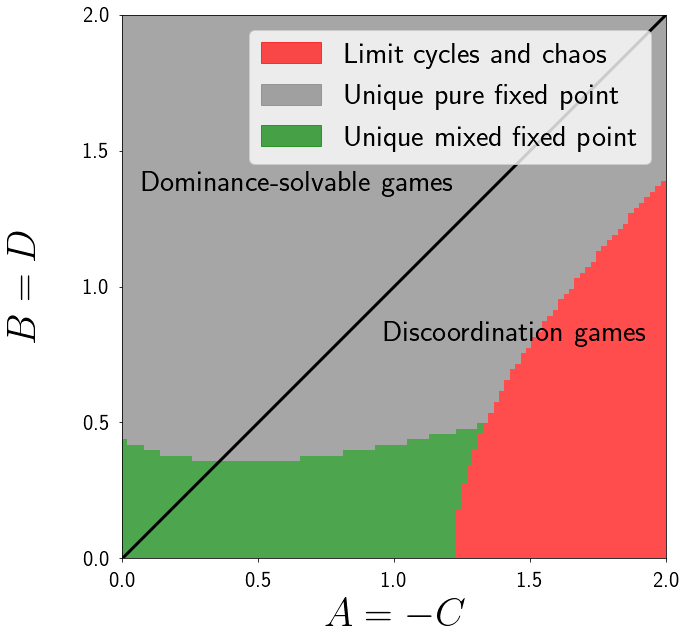

In [142]:
#Here plots the taxonomy for all asymmetric games


Alist = linspace(0,2,ngrid+1)
Blist = linspace(2,0,ngrid+1)
fig=figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
vmax=3.
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'red'),
                                                    (1 / vmax, 'grey'),
                                                    (2 / vmax, 'green'),
                                                    (3 / vmax, 'grey')]
                                        )
#pcolor(Alist, Blist, array(taxonomy), cmap=cmap, vmin=0, vmax=3.0)
imshow(taxonomy, cmap=cmap, vmin=0, vmax=3.0,interpolation="none",extent=[0,2,0,2], alpha=0.7)

xlabel(r'$A=-C$',fontsize=40)
h = ylabel(r'$B=D$',fontsize=40)
ax.set_xticks(linspace(0,2,5))
ax.set_xticklabels(linspace(0,2,5), fontsize = 22)
ax.set_yticks(linspace(0,2,5))
ax.set_yticklabels(linspace(0,2,5), fontsize = 22)
ax.yaxis.labelpad = 40
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
l = Line2D([0,2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
ax.text(0.65,1.35,"Dominance-solvable games", fontsize = 30,ha="center")
ax.text(1.45,0.8,"Discoordination games", fontsize = 30,ha="center")
unstablefp = mpatches.Patch(color='red', alpha=0.7, label='Limit cycles and chaos')
uniquepurefp = mpatches.Patch(color='grey',alpha=0.7, label='Unique pure fixed point')
uniquemixedfp = mpatches.Patch(color='green', alpha=0.7,label='Unique mixed fixed point')

legend(handles=[unstablefp,uniquepurefp,uniquemixedfp],fontsize = 30)
#savefig("ACnegative.pdf")

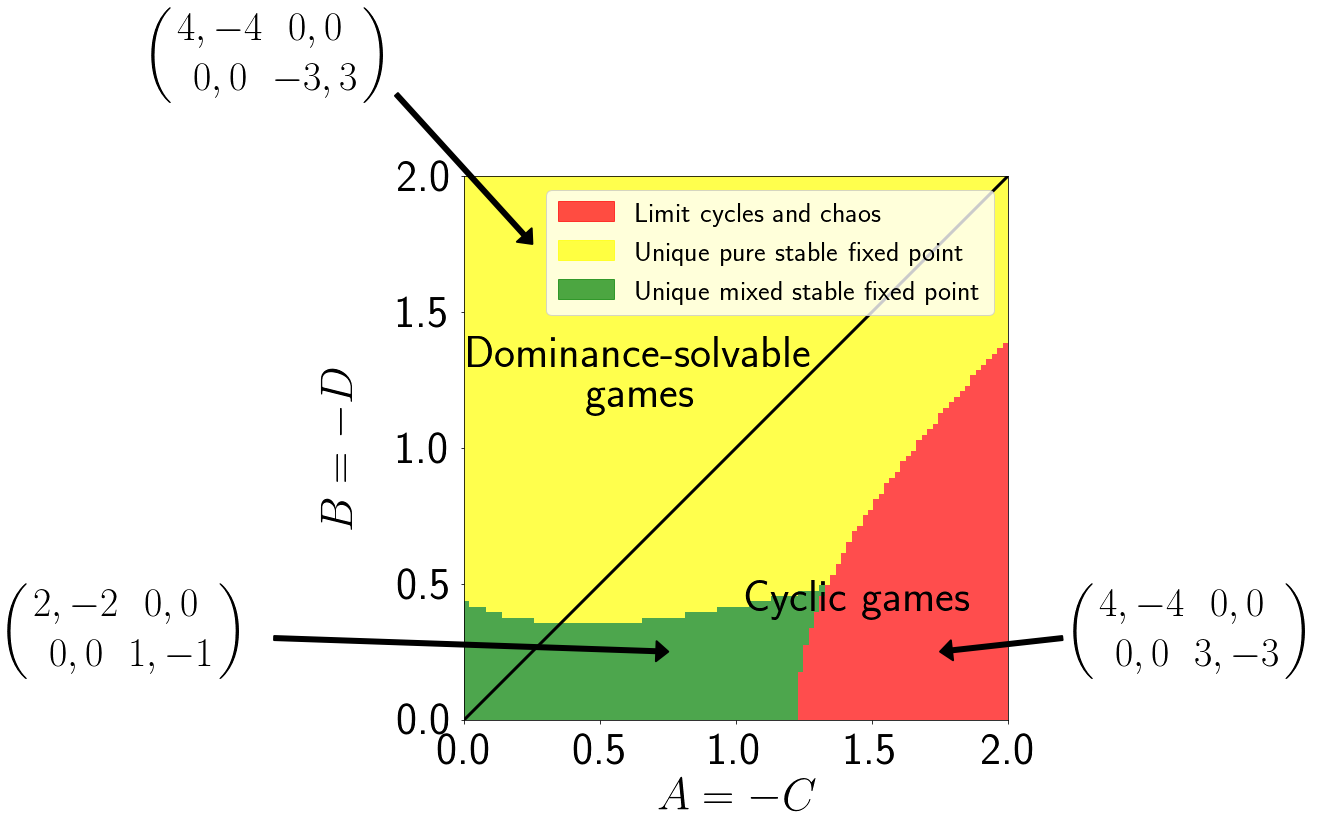

In [143]:
rcParams['text.usetex'] = True


Alist = linspace(0,2,ngrid+1)
Blist = linspace(2,0,ngrid+1)
fig=figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
vmax=3.
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'red'),
                                                    (1 / vmax, 'yellow'),
                                                    (2 / vmax, 'green'),
                                                    (3 / vmax, 'yellow')]
                                        )
#pcolor(Alist, Blist, array(taxonomy), cmap=cmap, vmin=0, vmax=3.0)
imshow(taxonomy, cmap=cmap, vmin=0, vmax=3.0,interpolation="none",extent=[0,2,0,2], alpha=0.7)

xlabel(r'$A=-C$',fontsize=45)
h = ylabel(r'$B=-D$',fontsize=45)
ax.set_xticks(linspace(0,2,5))
ax.set_xticklabels(linspace(0,2,5), fontsize = 45)
ax.set_yticks(linspace(0,2,5))
ax.set_yticklabels(linspace(0,2,5), fontsize = 45)
ax.yaxis.labelpad = 40
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
l = Line2D([0,2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
ax.text(0.65,1.30,"Dominance-solvable", fontsize = 45,ha="center")
ax.text(0.65,1.15,"games", fontsize = 45,ha="center")
ax.text(1.45,0.4,"Cyclic games", fontsize = 45,ha="center")
unstablefp = mpatches.Patch(color='red', alpha=0.7, label='Limit cycles and chaos')
uniquepurefp = mpatches.Patch(color='yellow',alpha=0.7, label='Unique pure stable fixed point')
uniquemixedfp = mpatches.Patch(color='green', alpha=0.7,label='Unique mixed stable fixed point')

legend(handles=[unstablefp,uniquepurefp,uniquemixedfp],fontsize = 28)


figtext(-0.3,1.,r'$\left( {\begin{array}{cc}4,-4  & 0,0 \\       0,0  & -3,3    \end{array} } \right)$',fontsize = 40,color="k")
ax.annotate('', xy=(0.25, 1.75), xytext=(-0.25,2.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.98,0.2,r'$\left( {\begin{array}{cc}4,-4  & 0,0 \\       0,0  & 3,-3    \end{array} } \right)$',fontsize = 40,color="k")
ax.annotate('', xy=(1.75, 0.25), xytext=(2.2,0.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(-0.5,0.2,r'$\left( {\begin{array}{cc}2,-2  & 0,0 \\       0,0  & 1,-1    \end{array} } \right)$',fontsize = 40,color="k")
ax.annotate('', xy=(0.75, 0.25), xytext=(-0.7,0.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

#savefig("ACnegative_annotated.png", bbox_inches = 'tight')



In [388]:
#Now antisymmetric games

In [4]:
def psiR(x):
    return beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B)
def psiC(x):
    return beta/alpha*(C * tanh(beta/alpha * (A * tanh(x)+B)) + D)

def makeplotasymmetric():
    x=linspace(minx,maxx,201)
    minyR = min(psiR(x))-ymargin
    maxyR = max(psiR(x))+ymargin
    minyC = min(psiC(x))-ymargin
    maxyC = max(psiC(x))+ymargin
    miny = min([minyR,minyC])
    maxy = max([maxyR,maxyC])
    
    fig=figure(figsize=(13,3.5))
    ax1 = fig.add_subplot(1,2,1) 
    ax2 = fig.add_subplot(1,2,2) 


    ax1.spines['left'].set_position('zero')
    ax1.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')

    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    ax1.set_xticks(linspace(minx,maxx,5))
    ax1.set_xticklabels([round(i,1) for i in linspace(minx,maxx,5)], fontsize = 22)
    ax1.set_yticks(linspace(miny,maxy,5))
    ax1.set_yticklabels([round(i,1) for i in linspace(miny,maxy,5)], fontsize = 22)

    ax1.set_xlim((minx,maxx))
    ax1.set_ylim((miny,maxy))

    ax1.text(maxx*1.1,-maxy/10,r'$\tilde{x}$',fontsize=35)
    ax1.text(maxx*posxx,maxy*posxy,r'$\tilde{x},\tilde{y}$',fontsize=35,color="red")
    ax1.text(maxx*pospsiRx,maxy*pospsiRy,r'$\Psi^R(\tilde{x})$',fontsize=35,color="blue")
    ax1.text(maxx*pospsiCx,maxy*pospsiCy,r'$\Psi^C(\tilde{y})$',fontsize=35,color="green")

    ax1.plot(x,psiR(x),color="blue",linewidth=2)
    ax1.plot(x,psiC(x),color="green",linewidth=2)
    ax1.plot(x,x,color="red",linewidth=2)

    solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
    solutionsunstable = 1/(1+exp(-2*array(unstable)))
    solutionsstable = 1/(1+exp(-2*array(stable)))
    solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
    solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
    sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
    sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
    ax2.set_xticks(linspace(0,1,3))
    ax2.set_xticklabels(linspace(0,1,3), fontsize = 25)
    ax2.set_yticks(linspace(0,1,3))
    ax2.set_yticklabels(linspace(0,1,3), fontsize = 25)

    plt.xlabel(r'$x$',fontsize=40) 
    plt.ylabel(r'$y$',fontsize=40) 
    ax2.set_aspect('equal')
    ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
    ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
    ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

    #savefig("illustration_solution_1.png", bbox_inches = 'tight')

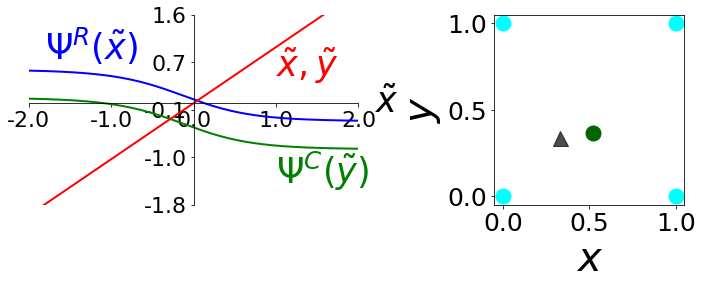

In [5]:
alpha = 0.8
beta = 0.8
A = 0.75
B = 0.25
C = -A
D = -B
findsolutions(alpha,beta,A,B,C,D)
minx = -2
maxx = 2
posxx = 0.5
posxy = 0.3
pospsiRx = -0.9
pospsiRy = 0.5
pospsiCx = 0.5
pospsiCy = -0.9
ymargin = 1

NElistR=[(C-D)/(2*C)]
NElistC=[(A-B)/(2*A)]

makeplotasymmetric()

#savefig("illustration_solution_5.png", bbox_inches = 'tight')

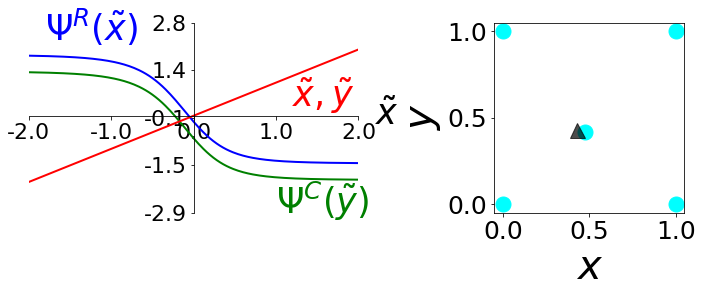

In [13]:
alpha = 0.8
beta = 0.8
A = 1.75
B = 0.25
C = -A
D = -B
findsolutions(alpha,beta,A,B,C,D)
minx = -2
maxx = 2
posxx = 0.6
posxy = 0.1
pospsiRx = -0.9
pospsiRy = 0.8
pospsiCx = 0.5
pospsiCy = -1.05
ymargin = 1

NElistR=[(C-D)/(2*C)]
NElistC=[(A-B)/(2*A)]

makeplotasymmetric()

savefig("illustration_solution_6.png", bbox_inches = 'tight')

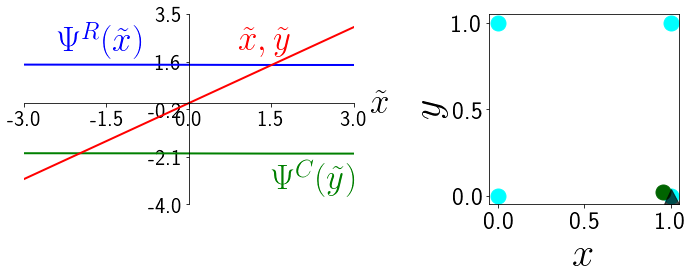

In [201]:
alpha = 0.8
beta = 0.8
A = 0.25
B = 1.75
C = -A
D = -B
findsolutions(alpha,beta,A,B,C,D)
minx = -3
maxx = 3
posxx = 0.3
posxy = 0.6
pospsiRx = -0.8
pospsiRy = 0.6
pospsiCx = 0.5
pospsiCy = -0.95
ymargin = 2

NElistR=[1]
NElistC=[0]

makeplotasymmetric()

savefig("illustration_solution_7.png", bbox_inches = 'tight')

In [387]:
#Now asymmetric games

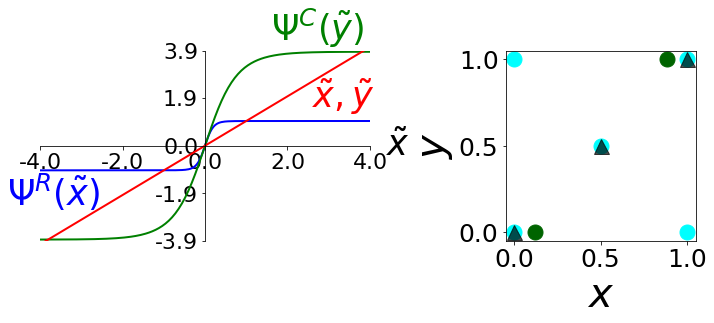

In [20]:
alpha = 0.5
beta = 0.5
A = 1.
B = 0
C = 5.
D = 0
findsolutions(alpha,beta,A,B,C,D)
minx = -4
maxx = 4
posxx = 0.65
posxy = 0.4
pospsiRx = -1.2
pospsiRy = -0.63
pospsiCx = 0.4
pospsiCy = 1.1
ymargin = 0.05

NElistR=[0,1,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

makeplotasymmetric()

savefig("illustration_solution_8.png", bbox_inches = 'tight')

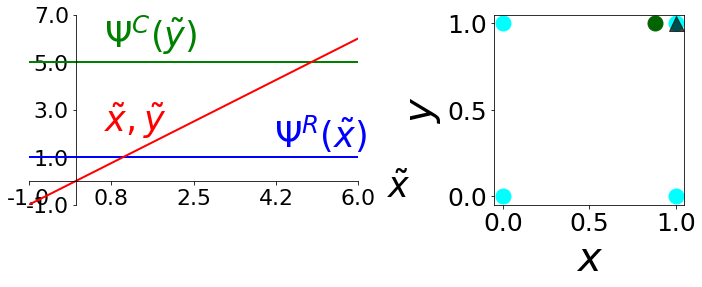

In [23]:
alpha = 0.5
beta = 0.5
A = 0
B = 1
C = 0
D = 5
findsolutions(alpha,beta,A,B,C,D)
minx = -1
maxx = 6
posxx = 0.1
posxy = 0.3
pospsiRx = 0.7
pospsiRy = 0.2
pospsiCx = 0.1
pospsiCy = 0.8
ymargin = 2

NElistR=[1]
NElistC=[1]

makeplotasymmetric()

savefig("illustration_solution_9.png", bbox_inches = 'tight')

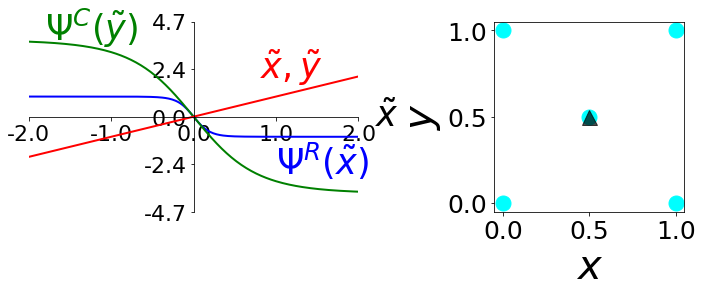

In [27]:
alpha = 0.5
beta = 0.5
A = 1.
B = 0
C = -5.
D = 0
findsolutions(alpha,beta,A,B,C,D)
minx = -2
maxx = 2
posxx = 0.4
posxy = 0.4
pospsiRx = 0.5
pospsiRy = -0.6
pospsiCx = -0.9
pospsiCy = 0.8
ymargin = 1

NElistR=[(C-D)/(2*C)]
NElistC=[(A-B)/(2*A)]

makeplotasymmetric()

savefig("illustration_solution_10.png", bbox_inches = 'tight')

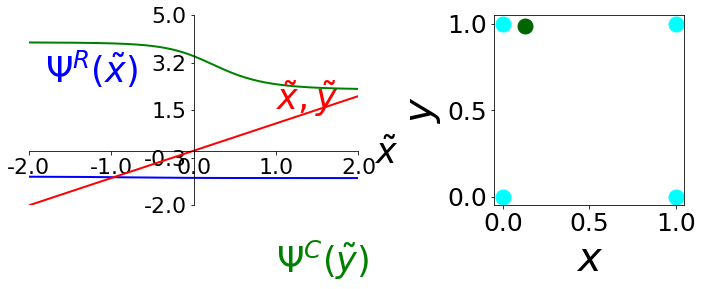

In [8]:
alpha = 0.8
beta = 0.8
A = -1.5
B =0.5 
C = 1
D = 3
findsolutions(alpha,beta,A,B,C,D)
minx = -2
maxx = 2
posxx = 0.5
posxy = 0.3
pospsiRx = -0.9
pospsiRy = 0.5
pospsiCx = 0.5
pospsiCy = -0.9
ymargin = 1

NElistR=[]
NElistC=[]

makeplotasymmetric()

#savefig("illustration_solution_5.png", bbox_inches = 'tight')

In [409]:
NElistR

[0]

In [23]:
#Redo the figures with continuous scale between mixed and pure fixed points

ngrid = 100
taxonomy = [[3 for x in range(2*ngrid+1)] for x in range(ngrid+1)] 
i=0
j=0
for B in linspace(2,0,ngrid+1):
    j = 0
    for A in linspace(-2,2,2*ngrid+1):
        C = A
        D = B
        alpha = 0.5
        beta = 0.5

        solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
        sol = 1/(1+exp(-2*array(stable)))
        
        if len(sol)==0: 
            j = j + 1
            continue
        
        if sol.shape[0]==2: taxonomy[i][j]=0
        if sol.shape[0]==1: taxonomy[i][j]=abs(sol[0][0]-0.5)
        j = j + 1
    i = i + 1   

C:\Users\marco\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\marco\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [24]:
text_file = open("taxonomynumericalcontinuous.txt", "w")
text_file.write(str(taxonomy))
text_file.close()

In [75]:
taxonomy = eval(open("taxonomynumericalcontinuous.txt", "r").read())
for i in range(array(taxonomy).shape[0]):
    for j in range(array(taxonomy).shape[1]):
        if taxonomy[i][j]>0: taxonomy[i][j] = (taxonomy[i][j])*2+1
for i in range(array(taxonomy).shape[0]):
    taxonomy[100][i+50] = 1
taxonomy[13][2]=0
taxonomy[62][9]=0
taxonomy[67][34]=0
taxonomy[92][17]=0
taxonomy[99][110]=1

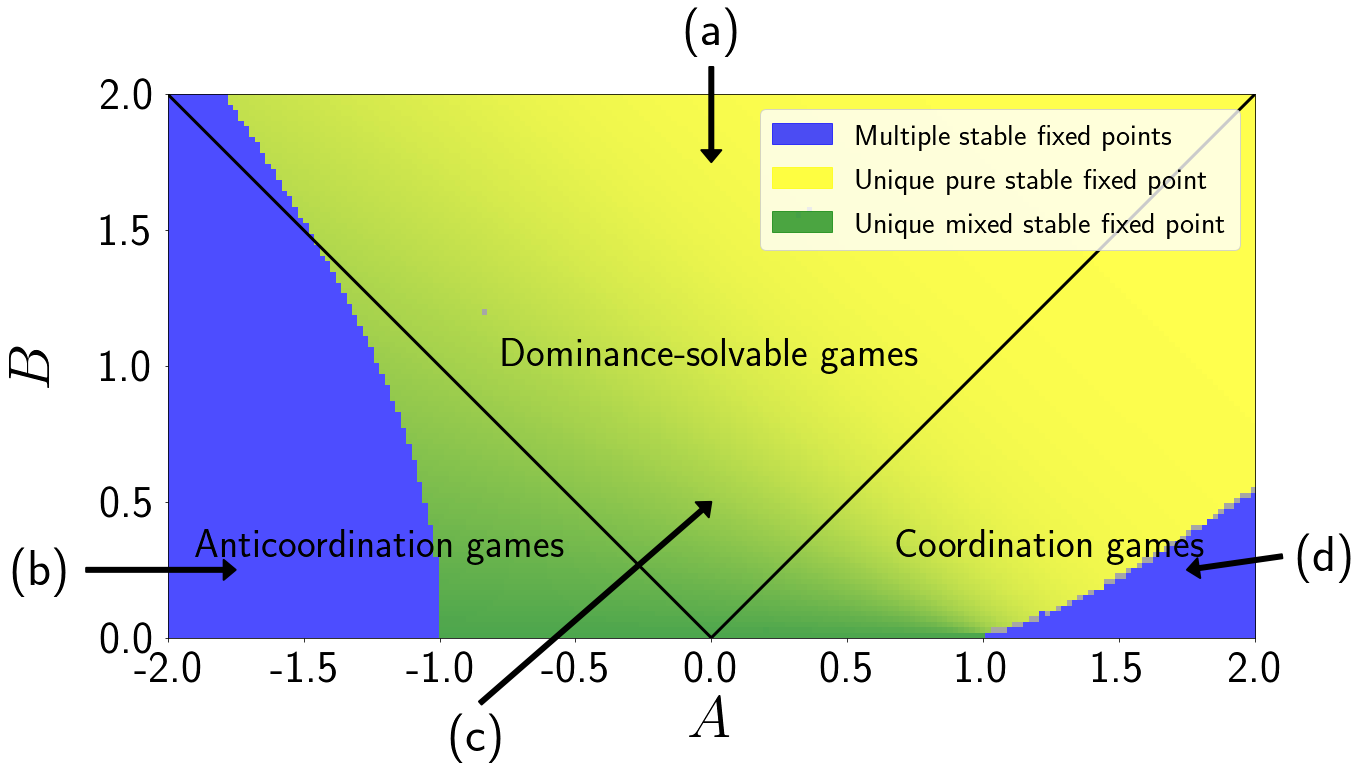

In [85]:
#here plots the taxonomy with game examples

ngrid = 100

rcParams['text.usetex'] = True

Alist = linspace(-2,2,2*ngrid+1)
Blist = linspace(2,0,ngrid+1)
fig=figure(figsize=(21,10))
ax = fig.add_subplot(1,1,1) 
ax.get_position()
#ax.set_position([0.2,0.2,box.width*0.5, box.height*0.5])

vmax=3.
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'blue'),
                                                    (1 / vmax, 'green'),
                                                    (2 / vmax, 'yellow'),
                                                    (3 / vmax, 'grey')]
                                        )
#pcolor(Alist, Blist, array(taxonomy), cmap=cmap, vmin=0, vmax=3.0)
ax.imshow(taxonomy, cmap=cmap, vmin=0, vmax=3.0,interpolation="none",extent=[-2,2,0,2], alpha=0.7)

xlabel(r'$A$',fontsize=60)
h = ylabel(r'$B$',fontsize=60)
ax.set_xticks(linspace(-2,2,9))
ax.set_xticklabels(linspace(-2,2,9), fontsize = 45)
ax.set_yticks(linspace(0,2,5))
ax.set_yticklabels(linspace(0,2,5), fontsize = 45)
ax.yaxis.labelpad = 40
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
l = Line2D([0,2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
l = Line2D([0,-2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
ax.text(0,1,"Dominance-solvable games", fontsize = 40,ha="center")
ax.text(-1.22,0.3,"Anticoordination games", fontsize = 40,ha="center")
ax.text(1.25,0.3,"Coordination games", fontsize = 40,ha="center")
multiplefp = mpatches.Patch(color='blue', alpha=0.7, label='Multiple stable fixed points')
uniquepurefp = mpatches.Patch(color='yellow',alpha=0.7, label='Unique pure stable fixed point')
uniquemixedfp = mpatches.Patch(color='green', alpha=0.7,label='Unique mixed stable fixed point')
legend(handles=[multiplefp,uniquepurefp,uniquemixedfp],fontsize = 30,loc=1)

figtext(0.05,0.2,"(b)",fontsize = 50,color="k")
ax.annotate('', xy=(-1.75, 0.25), xytext=(-2.3, 0.25), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.9,0.22,"(d)",fontsize = 50,color="k")
ax.annotate('', xy=(1.75, 0.25), xytext=(2.1, 0.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.495,0.95,"(a)",fontsize = 50,color="k")
ax.annotate('', xy=(0, 1.75), xytext=(0, 2.1), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.34,-0.03,"(c)",fontsize = 50,color="k")
ax.annotate('', xy=(0, 0.5), xytext=(-0.85, -0.24), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

savefig("ACpositive_annotated.pdf", bbox_inches = 'tight')

In [145]:
#Here finds the taxonomy for all asymmetric games


ngrid = 100
taxonomy = [[3 for x in range(ngrid+1)] for x in range(ngrid+1)] 
i=0
j=0
for B in linspace(2,0,ngrid+1):
    j = 0
    for A in linspace(0,2,ngrid+1):
        C = -A
        D = B
        alpha = 0.8
        beta = 0.8

        solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)

        if len(solutionstilde)==0: 
            j = j + 1
            continue
        
        sol = 1/(1+exp(-2*array(stable)))
        
        if len(sol)==0: 
            taxonomy[i][j]=0
            j = j + 1
            continue
        if sol.shape[0]==1: taxonomy[i][j]=abs(sol[0][0]-0.5)
        j = j + 1
    i = i + 1    

In [146]:
text_file = open("taxonomynumericalcontinuousasymmetric.txt", "w")
text_file.write(str(taxonomy))
text_file.close()

In [160]:
taxonomy = eval(open("taxonomynumericalcontinuousasymmetric.txt", "r").read())


In [174]:
taxonomy = eval(open("taxonomynumericalcontinuousasymmetric.txt", "r").read())
for i in range(array(taxonomy).shape[0]):
    for j in range(array(taxonomy).shape[1]):
        if taxonomy[i][j]>0: taxonomy[i][j] = (taxonomy[i][j])*2+1
taxonomy[83][80]=0
taxonomy[94][68]=0
for i in range(array(taxonomy).shape[0]):
    for j in range(array(taxonomy).shape[1]):
        if taxonomy[i][j]==7: taxonomy[i][j] = taxonomy[i][j-1]
for i in range(array(taxonomy).shape[1]):
    if isinstance(taxonomy[100][i],float): taxonomy[100][i]=1

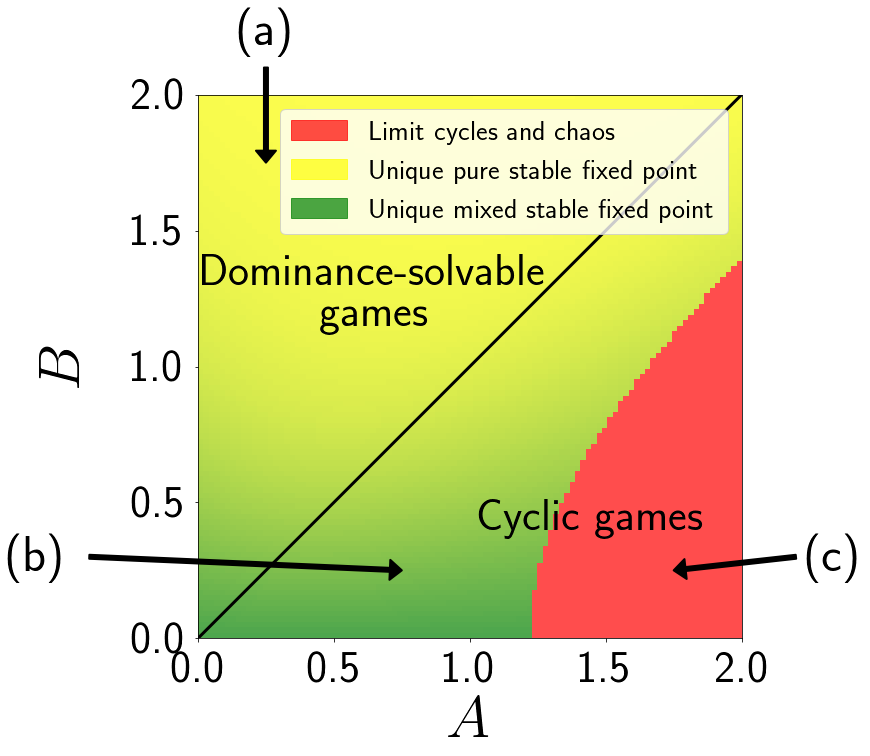

In [193]:
rcParams['text.usetex'] = True


Alist = linspace(0,2,ngrid+1)
Blist = linspace(2,0,ngrid+1)
fig=figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
vmax=3.
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'red'),
                                                    (1 / vmax, 'green'),
                                                    (2 / vmax, 'yellow'),
                                                    (3 / vmax, 'grey')]
                                        )
#pcolor(Alist, Blist, array(taxonomy), cmap=cmap, vmin=0, vmax=3.0)
imshow(taxonomy, cmap=cmap, vmin=0, vmax=3.0,interpolation="none",extent=[0,2,0,2], alpha=0.7)

xlabel(r'$A$',fontsize=60)
h = ylabel(r'$B$',fontsize=60)
ax.set_xticks(linspace(0,2,5))
ax.set_xticklabels(linspace(0,2,5), fontsize = 45)
ax.set_yticks(linspace(0,2,5))
ax.set_yticklabels(linspace(0,2,5), fontsize = 45)
ax.yaxis.labelpad = 40
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
l = Line2D([0,2],[0,2],color="black",linewidth=3)                                    
ax.add_line(l)   
ax.text(0.65,1.30,"Dominance-solvable", fontsize = 45,ha="center")
ax.text(0.65,1.15,"games", fontsize = 45,ha="center")
ax.text(1.45,0.4,"Cyclic games", fontsize = 45,ha="center")
unstablefp = mpatches.Patch(color='red', alpha=0.7, label='Limit cycles and chaos')
uniquepurefp = mpatches.Patch(color='yellow',alpha=0.7, label='Unique pure stable fixed point')
uniquemixedfp = mpatches.Patch(color='green', alpha=0.7,label='Unique mixed stable fixed point')

legend(handles=[unstablefp,uniquepurefp,uniquemixedfp],fontsize = 28)


figtext(0.19,0.95,"(a)",fontsize = 50,color="k")
ax.annotate('', xy=(0.25, 1.75), xytext=(0.25,2.1), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(0.98,0.22,"(c)",fontsize = 50,color="k")
ax.annotate('', xy=(1.75, 0.25), xytext=(2.2,0.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

figtext(-0.13,0.22,"(b)",fontsize = 50,color="k")
ax.annotate('', xy=(0.75, 0.25), xytext=(-0.4,0.3), 
            arrowprops=dict(headwidth=20, color='k',linewidth=2))

savefig("ACnegative_annotated.png", bbox_inches = 'tight')



In [ ]:
def makeplot():
    x=linspace(minx,maxx,201)
    miny = min(psi(x))-1
    maxy = max(psi(x))+1


    fig=figure(figsize=(12,3.5))
    ax1 = fig.add_subplot(1,2,1) 
    ax2 = fig.add_subplot(1,2,2) 

    ax1.spines['left'].set_position('zero')
    ax1.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    ax1.set_xticks(linspace(minx,maxx,5))
    ax1.set_xticklabels([round(i,1) for i in linspace(minx,maxx,5)], fontsize = 22)
    ax1.set_yticks(linspace(miny,maxy,5))
    ax1.set_yticklabels([round(i,1) for i in linspace(miny,maxy,5)], fontsize = 22)

    ax1.set_xlim((minx,maxx))
    ax1.set_ylim((miny,maxy))

    ax1.text(maxx*1.1,-maxy/10,r'$\tilde{x}$',fontsize=35)
    ax1.text(maxx*posxx,maxy*posxy,r'$\tilde{x}$',fontsize=35,color="red")
    ax1.text(maxx*pospsix,maxy*pospsiy,r'$\Psi(\tilde{x})$',fontsize=35,color="blue")

    ax1.plot(x,psi(x),color="blue",linewidth=2)
    ax1.plot(x,x,color="red",linewidth=2)

    solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
    solutionsunstable = 1/(1+exp(-2*array(unstable)))
    solutionsstable = 1/(1+exp(-2*array(stable)))
    solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
    solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
    sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
    sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
    ax2.set_xticks(linspace(0,1,3))
    ax2.set_xticklabels(linspace(0,1,3), fontsize = 25)
    ax2.set_yticks(linspace(0,1,3))
    ax2.set_yticklabels(linspace(0,1,3), fontsize = 25)

    plt.xlabel(r'$x$',fontsize=40) 
    plt.ylabel(r'$y$',fontsize=40) 
    ax2.set_aspect('equal')
    ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
    ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
    ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

    #savefig("illustration_solution_1.png", bbox_inches = 'tight')

In [18]:
rcParams['text.usetex'] = True

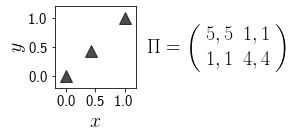

In [71]:
NElistR=[0,1,3/7]
NElistC=[0,1,3/7]

fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 

ax2.plot(NElistR,NElistC,'k^',markersize=12,alpha=0.7)

# ax2.set_xticks(linspace(0,1,2))
# ax2.set_xticklabels(linspace(0,1,2), fontsize = 15)
# ax2.set_yticks(linspace(0,1,2))
# ax2.set_yticklabels(linspace(0,1,2), fontsize = 15)
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(linspace(0,1,3), fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')

plt.text(1.4, 0.5, r'$\Pi = \left( {\begin{array}{cc} 5,5 & 1,1 \\       1,1 & 4,4    \end{array} } \right)$',\
         fontsize=20,va="center")

savefig("../Wp-taxonomy-2x2games/img/coordination_game.pdf", bbox_inches = 'tight')

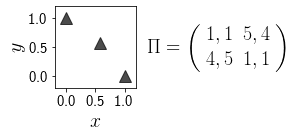

In [115]:
NElistR=[0,1,4/7]
NElistC=[1,0,4/7]

fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 

ax2.plot(NElistR,NElistC,'k^',markersize=12,alpha=0.7)

# ax2.set_xticks(linspace(0,1,2))
# ax2.set_xticklabels(linspace(0,1,2), fontsize = 15)
# ax2.set_yticks(linspace(0,1,2))
# ax2.set_yticklabels(linspace(0,1,2), fontsize = 15)
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(linspace(0,1,3), fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')

plt.text(1.4, 0.5, r'$\Pi = \left( {\begin{array}{cc} 1,1 & 5,4 \\       4,5 & 1,1    \end{array} } \right)$',\
         fontsize=20,va="center")

savefig("../Wp-taxonomy-2x2games/img/anticoordination_game.pdf", bbox_inches = 'tight')

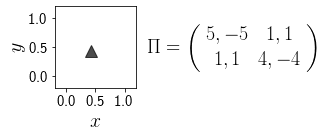

In [74]:
NElistR=[3/7]
NElistC=[3/7]

fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 

ax2.plot(NElistR,NElistC,'k^',markersize=12,alpha=0.7)

# ax2.set_xticks(linspace(0,1,2))
# ax2.set_xticklabels(linspace(0,1,2), fontsize = 15)
# ax2.set_yticks(linspace(0,1,2))
# ax2.set_yticklabels(linspace(0,1,2), fontsize = 15)
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(linspace(0,1,3), fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')

plt.text(1.4, 0.5, r'$\Pi = \left( {\begin{array}{cc} 5,-5 & 1,1 \\       1,1 & 4,-4   \end{array} } \right)$',\
         fontsize=20,va="center")

savefig("../Wp-taxonomy-2x2games/img/cyclic_game.pdf", bbox_inches = 'tight')

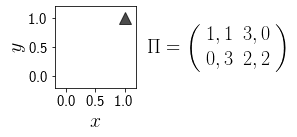

In [73]:
NElistR=[1]
NElistC=[1]

fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 

ax2.plot(NElistR,NElistC,'k^',markersize=12,alpha=0.7)

# ax2.set_xticks(linspace(0,1,2))
# ax2.set_xticklabels(linspace(0,1,2), fontsize = 15)
# ax2.set_yticks(linspace(0,1,2))
# ax2.set_yticklabels(linspace(0,1,2), fontsize = 15)
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(linspace(0,1,3), fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')

plt.text(1.4, 0.5, r'$\Pi = \left( {\begin{array}{cc} 1,1 & 3,0 \\       0,3 & 2,2   \end{array} } \right)$',\
         fontsize=20,va="center")

savefig("../Wp-taxonomy-2x2games/img/dominance_game.pdf", bbox_inches = 'tight')

In [68]:
551/9/2

30.61111111111111

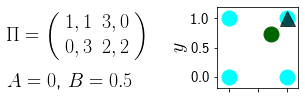

In [107]:
def drawplot(alpha,beta,A,B,C,D):
    x=linspace(-10,10,101)
    plot(x,beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B))
    plot(x,x)

def psi(x):
    return beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B)

alpha = 0.5
beta = 0.5
A = 0
B = 0.5
C = A
D = B

minx = -2
maxx = 3
posxx = 0.35
posxy = 0.16
pospsix = 0.1
pospsiy = 0.5

NElistR=[1]
NElistC=[1]

x=linspace(minx,maxx,201)
miny = min(psi(x))-2
maxy = max(psi(x))+2


fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 


solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
solutionsunstable = 1/(1+exp(-2*array(unstable)))
solutionsstable = 1/(1+exp(-2*array(stable)))
solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(["","",""], fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

# plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')
ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

plt.text(-3.8, 0.7, r'$\Pi = \left( {\begin{array}{cc} 1,1 & 3,0 \\       0,3 & 2,2   \end{array} } \right)$',\
         fontsize=20,va="center")
plt.text(-3.8, -0.1, r'$A=0$, $B=0.5$',\
         fontsize=20,va="center")

savefig("game_c.pdf", bbox_inches = 'tight')

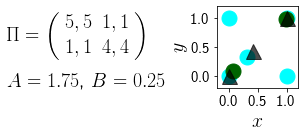

In [114]:
def drawplot(alpha,beta,A,B,C,D):
    x=linspace(-10,10,101)
    plot(x,beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B))
    plot(x,x)

def psi(x):
    return beta/alpha*(A * tanh(beta/alpha * (C * tanh(x)+D)) + B)

alpha = 0.5
beta = 0.5
A = 1.75
B = 0.25
C = A
D = B

minx = -2
maxx = 3
posxx = 0.35
posxy = 0.16
pospsix = 0.1
pospsiy = 0.5

NElistR=[0,1,(A-B)/(2*A)]
NElistC=[0,1,(A-B)/(2*A)]

x=linspace(minx,maxx,201)
miny = min(psi(x))-2
maxy = max(psi(x))+2


fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 


solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
solutionsunstable = 1/(1+exp(-2*array(unstable)))
solutionsstable = 1/(1+exp(-2*array(stable)))
solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(linspace(0,1,3), fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')
ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

plt.text(-3.8, 0.7, r'$\Pi = \left( {\begin{array}{cc} 5,5 & 1,1 \\       1,1 & 4,4   \end{array} } \right)$',\
         fontsize=20,va="center")
plt.text(-3.8, -0.1, r'$A=1.75$, $B=0.25$',\
         fontsize=20,va="center")

savefig("game_d.pdf", bbox_inches = 'tight')

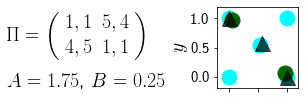

In [113]:
alpha = 0.5
beta = 0.5
A = -1.75
B = 0.25
C = A
D = B

minx = -2
maxx = 3
posxx = 0.35
posxy = 0.16
pospsix = 0.1
pospsiy = 0.5

NElistR=[0,1,(A-B)/(2*A)]
NElistC=[1,0,(A-B)/(2*A)]

x=linspace(minx,maxx,201)
miny = min(psi(x))-2
maxy = max(psi(x))+2


fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 


solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
solutionsunstable = 1/(1+exp(-2*array(unstable)))
solutionsstable = 1/(1+exp(-2*array(stable)))
solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(["","",""], fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

# plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')
ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

plt.text(-3.8, 0.7, r'$\Pi = \left( {\begin{array}{cc} 1,1 & 5,4 \\       4,5 & 1,1  \end{array} } \right)$',\
         fontsize=20,va="center")
plt.text(-3.8, -0.1, r'$A=1.75$, $B=0.25$',\
         fontsize=20,va="center")

savefig("game_b.pdf", bbox_inches = 'tight')

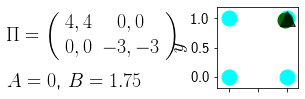

In [116]:
alpha = 0.5
beta = 0.5
A = 0
B = 1.75
C = A
D = B

minx = -2
maxx = 3
posxx = 0.35
posxy = 0.16
pospsix = 0.1
pospsiy = 0.5

NElistR=[1]
NElistC=[1]

x=linspace(minx,maxx,201)
miny = min(psi(x))-2
maxy = max(psi(x))+2


fig=figure(figsize=(3,1.5))
ax2 = fig.add_subplot(1,1,1) 


solutionstilde,unstable,stable = findsolutions(alpha,beta,A,B,C,D)
solutionsunstable = 1/(1+exp(-2*array(unstable)))
solutionsstable = 1/(1+exp(-2*array(stable)))
solliststableR=[solutionsstable[i][0] for i in range(len(solutionsstable))] 
solliststableC=[solutionsstable[i][1] for i in range(len(solutionsstable))] 
sollistunstableR=[solutionsunstable[i][0] for i in range(len(solutionsunstable))] + [0,1,0,1]
sollistunstableC=[solutionsunstable[i][1] for i in range(len(solutionsunstable))] + [1,0,0,1]
ax2.set_xlim(-0.2,1.2)
ax2.set_ylim(-0.2,1.2)
ax2.set_xticks(linspace(0,1,3))
ax2.set_xticklabels(["","",""], fontsize = 15)
ax2.set_yticks(linspace(0,1,3))
ax2.set_yticklabels(linspace(0,1,3), fontsize = 15)

# plt.xlabel(r'$x$',fontsize=20) 
plt.ylabel(r'$y$',fontsize=20) 
ax2.set_aspect('equal')
ax2.plot(sollistunstableR,sollistunstableC,'o',color="cyan",markersize=15)
ax2.plot(solliststableR,solliststableC,'o',color="darkgreen",markersize=15)
ax2.plot(NElistR,NElistC,'k^',markersize=15,alpha=0.7)

plt.text(-3.8, 0.7, r'$\Pi = \left( {\begin{array}{cc} 4,4 & 0,0 \\       0,0 & -3,-3  \end{array} } \right)$',\
         fontsize=20,va="center")
plt.text(-3.8, -0.1, r'$A=0$, $B=1.75$',\
         fontsize=20,va="center")

savefig("game_a.pdf", bbox_inches = 'tight')